# Example: Use EventDisplay Class

Before openning this notebook, run:

1. Enter virtual environment if not already in
```bash
source env/bin/activate
```

2. Setup enviromental variables so it knows where to find the packages
```bash
source setup.sh
```

In [1]:
"""
define enviromental variables. 

Since event_display uses drop source code and yaml config file, it needs to know where they're.
"""
import os
import sys
sys.path.append(os.environ['LIB_DIR'])
import matplotlib.pylab as plt
from event_display import EventDisplay


In [2]:
"""
OPTIONAL:
    enable interactive plotting. It requires ipympl to be installed. Try: 
        pip install ipympl
    
    Alternative, if you have created a virtual enviroment suggested in README, try:
        source env/bin/activate
"""
%matplotlib widget

In [3]:
# expand notebook to full width (this is optional)
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# load a raw data file in root
# by default, it also loads yaml/config.yaml file if nothing specified. You can use a diff config file: 
#      dp = EventDisplay("path/raw/root", "path/to/yaml/config")

DATA_DIR="../data/"
dp = EventDisplay(DATA_DIR+'phase1_muon_wbls_1pct_220921T1351.root')

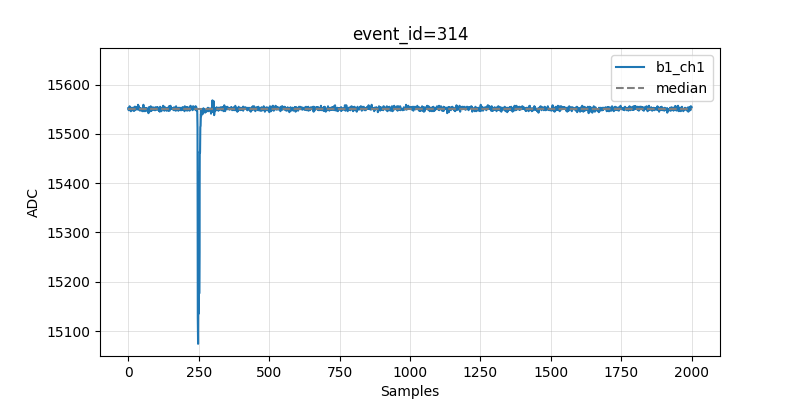

In [5]:
# you can plot individual channel of an event
dp.display_waveform(314, 'b1_ch1', baseline_subtracted=False)

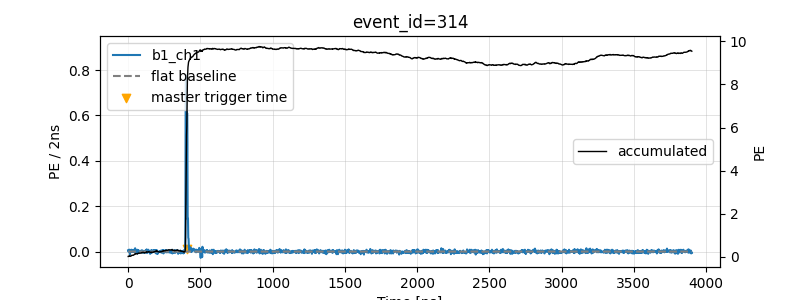

In [6]:
# you can plot baseline subtracted version
# this verion includes the conversion from ADC -> mV -> PE
#
# Also, you can adjust width and height of a figure
dp.fig_height=3
dp.fig_width=8
dp.display_waveform(314, 'b1_ch1', baseline_subtracted=True)

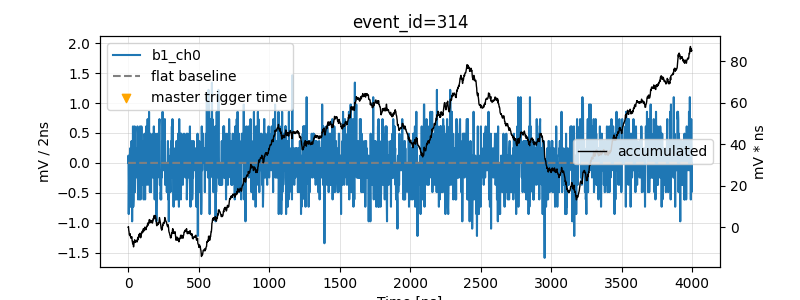

In [7]:
# you can look at the paddle waveform (non-signal channel)
# Notice the vertical unit is mV instead pe. We did not calibrate paddle.
dp.fig_height=3
dp.fig_width=8
dp.display_waveform(314, 'b1_ch0', baseline_subtracted=True)

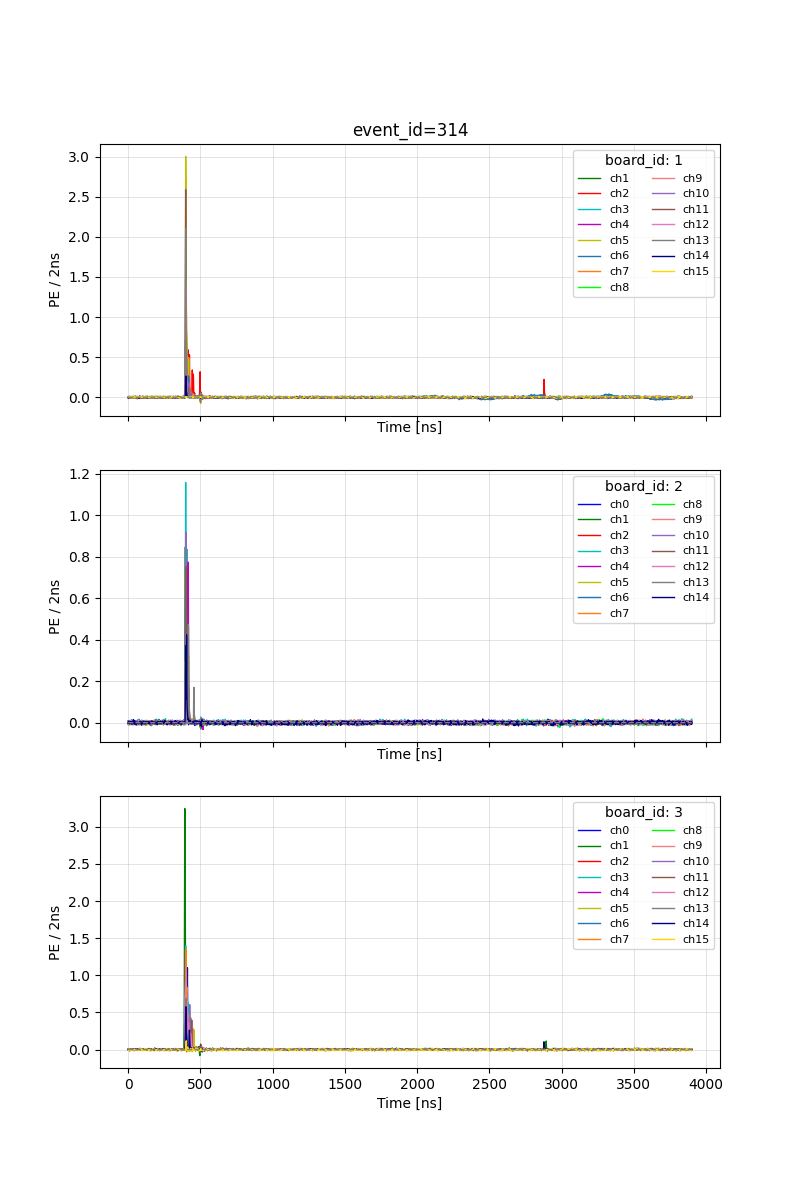

In [8]:
# you can plot all channels
# Notice all channels do not include non-signal channels (ex. paddle)
dp.display_waveform(314, 'all', baseline_subtracted=True)

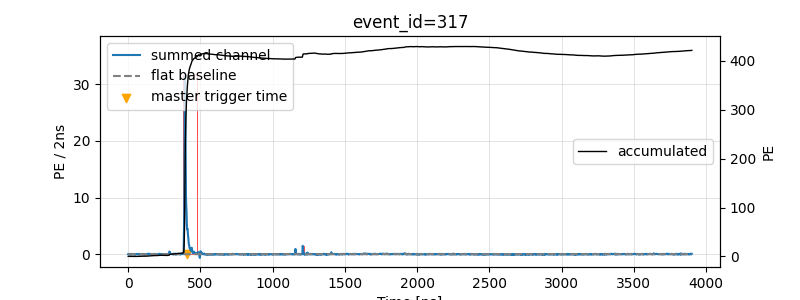

In [9]:
# you can plot the summed channel. Obviously you need subtract baseline before sum, so no need 
# to specify baseline_subtracted
# the red boxes are from pulse finder. Default to scipt peak finding. Parameters can be tunned in config.yaml file  
dp.display_waveform(317, 'sum')

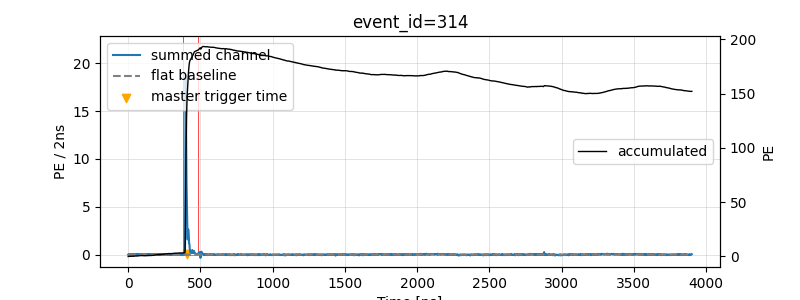

In [10]:
# you can specify a list of channel to sum. For example, the following list is sum of all bt channels
# hint: user_list=[101, 102, 103 ...] is also acceptable
# to plot sum of all signal channels, set user_summed_channel_list=None (default)
user_list=['adc_b1_ch1', 'adc_b1_ch2', 'adc_b1_ch3', 'adc_b1_ch4',
            'adc_b1_ch5', 'adc_b1_ch6', 'adc_b1_ch7', 'adc_b1_ch8',
            'adc_b1_ch9', 'adc_b1_ch10', 'adc_b1_ch11','adc_b1_ch12',
             'adc_b1_ch13', 'adc_b1_ch14', 'adc_b1_ch15','adc_b2_ch0',
             'adc_b2_ch1', 'adc_b2_ch2', 'adc_b2_ch3','adc_b2_ch4',
             'adc_b2_ch5', 'adc_b2_ch6', 'adc_b2_ch7','adc_b2_ch8',
             'adc_b2_ch9', 'adc_b2_ch10', 'adc_b2_ch11','adc_b2_ch12',
             'adc_b2_ch13', 'adc_b2_ch14', 
            ]
dp.set_user_summed_channel_list(user_list)
dp.display_waveform(314, 'sum')

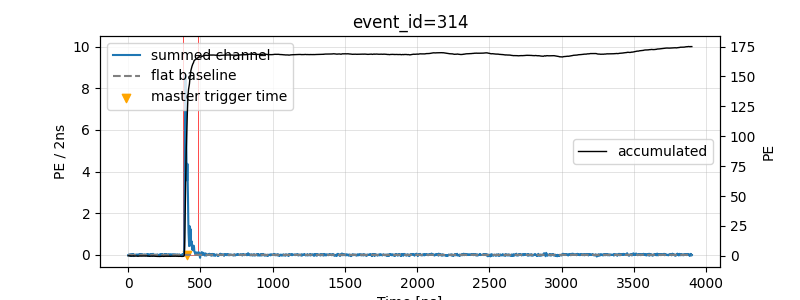

In [11]:
# For example, the following list is sum of all side channels
user_list=[300, 301, 302, 303, 304, 305, 306, 307, 
           308, 309, 310, 311, 312, 313, 314, 315]
dp.set_user_summed_channel_list(user_list)
dp.display_waveform(314, 'sum')

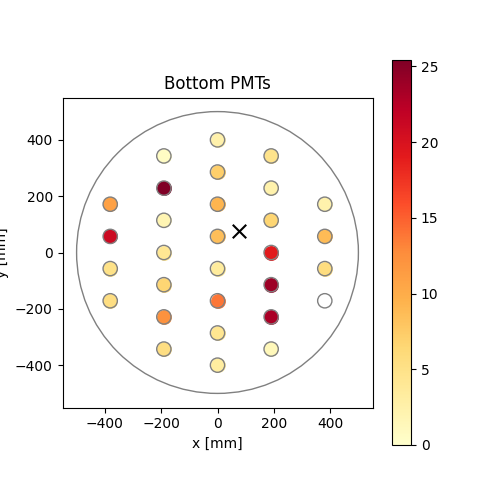

In [12]:
dp.get_bottom_pmt_hit_pattern(31, start_ns=380, end_ns=500)